<a href="https://colab.research.google.com/github/asimo945/Auto_GraphenePicker/blob/main/Exploring_Unspervised_ML_graphene_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:

def load_and_preprocess_image(image_path):
    """
    Loads an image from a file path and preprocesses it for clustering.
    The preprocessing steps include downsampling and converting to LAB color space.

    Parameters:
    - image_path: Path to the image file.

    Returns:
    - downsampled_image: The downsampled image.
    - pixel_values: Flattened array of pixel values in LAB color space.
    """
    from skimage.io import imread
    from skimage.transform import resize
    from skimage.color import rgb2lab

    # Load the image
    image = imread(image_path)

    # Downsample the image to reduce the number of pixels for clustering
    downsampled_image = resize(image, (image.shape[0] // 4, image.shape[1] // 4), anti_aliasing=True)

    # Convert the downsampled image from RGB to LAB color space
    image_lab = rgb2lab(downsampled_image)

    # Reshape the downsampled image data to a 2D array of pixels and 3 color values (LAB)
    pixel_values = image_lab.reshape((-1, 3))

    return downsampled_image, pixel_values

def apply_kmeans(pixel_values, n_clusters=3):
    """
    Applies K-means clustering to the pixel values of an image.

    Parameters:
    - pixel_values: 2D array of pixel values.
    - n_clusters: The number of clusters to form.

    Returns:
    - kmeans_labels: The labels of the clusters.
    """
    from sklearn.cluster import KMeans

    # Normalize the pixel values to ensure they contribute equally to the distance calculation
    normalized_pixel_values = pixel_values / pixel_values.max()

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=3, max_iter=50, tol=1e-2)

    # Fit K-means on the normalized pixel values
    kmeans.fit(normalized_pixel_values)

    # Get the labels assigned to each pixel
    kmeans_labels = kmeans.labels_

    return kmeans_labels

def visualize_segmentation(original_image, labels, title):
    """
    Visualizes the original image and its segmented version side by side.

    Parameters:
    - original_image: The original image.
    - labels: Cluster labels for each pixel.
    - title: Title for the segmentation plot.
    """
    import matplotlib.pyplot as plt

    # Reshape labels to the original image shape
    segmented_image = labels.reshape(original_image.shape[:2])

    # Plot the original and segmented images
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    # Segmented image
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='plasma')
    plt.title(title)
    plt.axis('off')

    plt.show()

def visualize_clustered_data_space_3d(pixel_values, labels, n_clusters):
    """
    Visualizes the color space after clustering in 3D, using the LAB color space components.

    Parameters:
    - pixel_values: 2D array of pixel values in LAB color space.
    - labels: Cluster labels for each pixel.
    - n_clusters: The number of clusters.
    """
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['red', 'green', 'blue','black']

    for i in range(n_clusters):
        # Select only data points with the target label
        idx = labels == i

        # Plot these points with the corresponding color
        ax.scatter(pixel_values[idx, 0], pixel_values[idx, 1], pixel_values[idx, 2], c=colors[i], label=f'Cluster {i + 1}', alpha=0.1)

    ax.set_title('Color Space after Clustering')
    ax.set_xlabel('L*')
    ax.set_ylabel('a*')
    ax.set_zlabel('b*')
    ax.legend()
    plt.show()

def plot_elbow_method(pixel_values):
    """
    Applies and plots the Elbow method to determine the optimal number of clusters for K-means clustering.

    Parameters:
    - pixel_values: 2D array of pixel values.
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt

    wcss = []  # Within-cluster sum of squares
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(pixel_values)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')  # Within cluster sum of squares
    plt.show()


In [27]:

def execution(image_path,n_clusters):
    # Load and preprocess the image
    original_image, pixel_values = load_and_preprocess_image(image_path)

    # Apply the Elbow method to determine the optimal number of clusters
    plot_elbow_method(pixel_values)

    # Apply K-means clustering with an assumed optimal number of clusters based on the Elbow method
    labels = apply_kmeans(pixel_values, n_clusters=3)

    # Visualize the segmentation
    visualize_segmentation(original_image, labels, 'Segmented Image (K-means, 3 Clusters)')

    # Visualize the color space after clustering in 3D
    visualize_clustered_data_space_3d(pixel_values, labels, n_clusters=3)

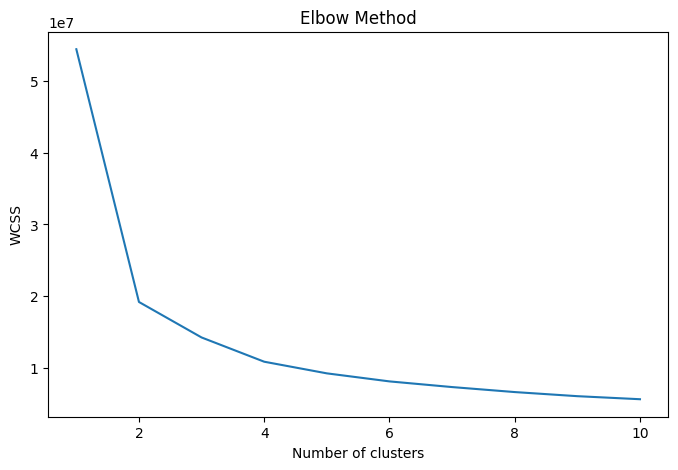

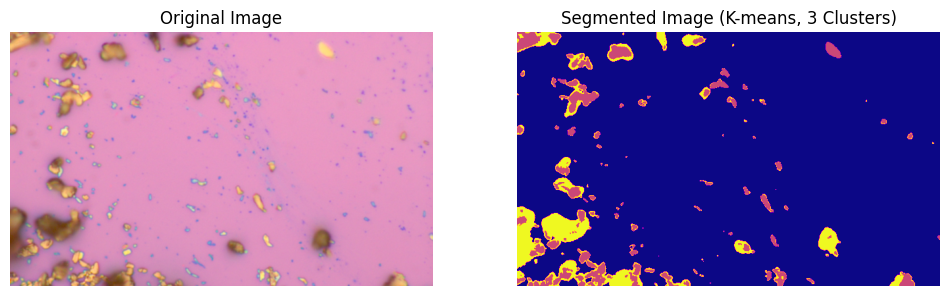

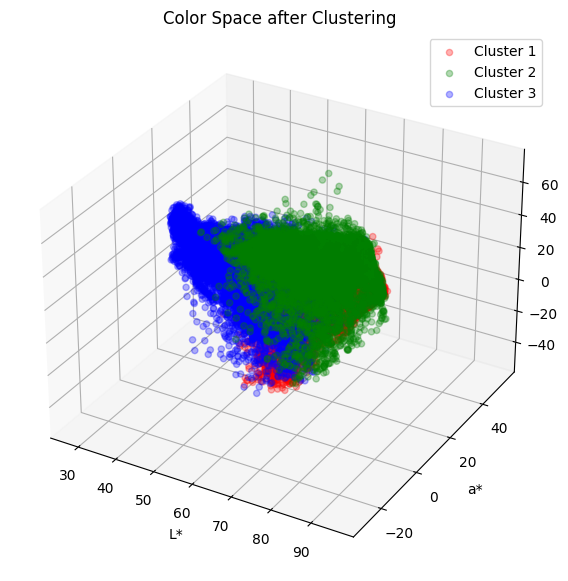

In [28]:
execution('/content/1.jpg',3)

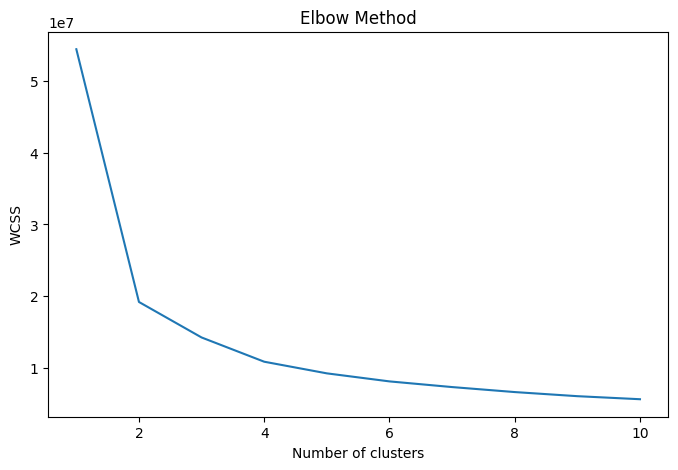

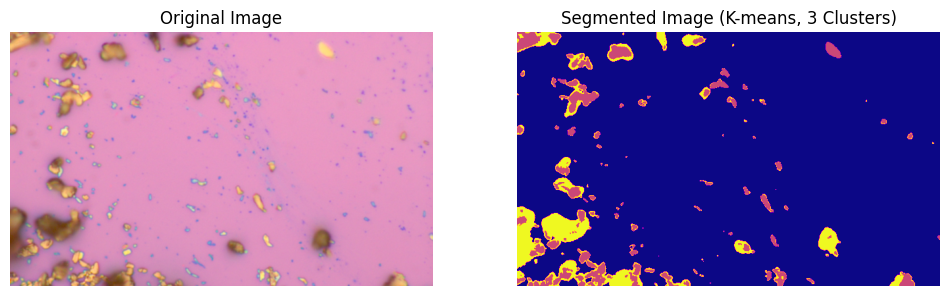

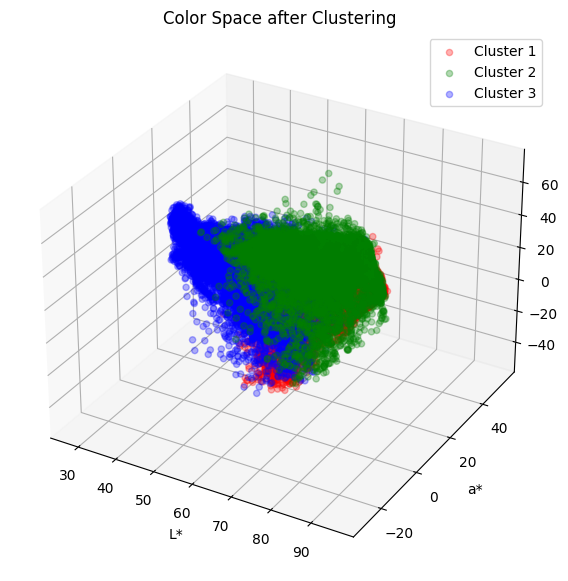

In [29]:
execution('/content/1.jpg',4)